In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc

In [2]:
from helpful_functions import generate_data, encode_columns, plot_corr, distance_beetween_two_matrix, tsne_visualization, evaluate

/home/datalab/miniconda3/envs/sergei_chirkov/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare data: Balance-Scale dataset

In [3]:
orig_data = pd.read_csv("balance-scale.data")
print(orig_data.shape)
orig_data.head()


(624, 5)


,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [4]:
metadata_balance = {'fields':
                    {
                        'B': {'type': 'categorical'},
                        '1': {'type': 'categorical'},
                        '1.1': {'type': 'categorical'},
                        '1.2': {'type': 'categorical'},
                        '1.3': {'type': 'categorical'}
                    }}

categorical_cols = ['B', '1', '1.1', '1.2', '1.3']

# CTGAN

In [5]:
synt_data = generate_data(orig_data, "CTGAN", 624)

In [6]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_balance)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.11it/s]


Overall Quality Score: 79.81%

Properties:
Column Shapes: 84.78%
Column Pair Trends: 74.84%


,Column,Metric,Quality Score
0,B,TVComplement,0.975962
1,1,TVComplement,0.822115
2,1.1,TVComplement,0.841346
3,1.2,TVComplement,0.806090
4,1.3,TVComplement,0.793269


In [7]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)


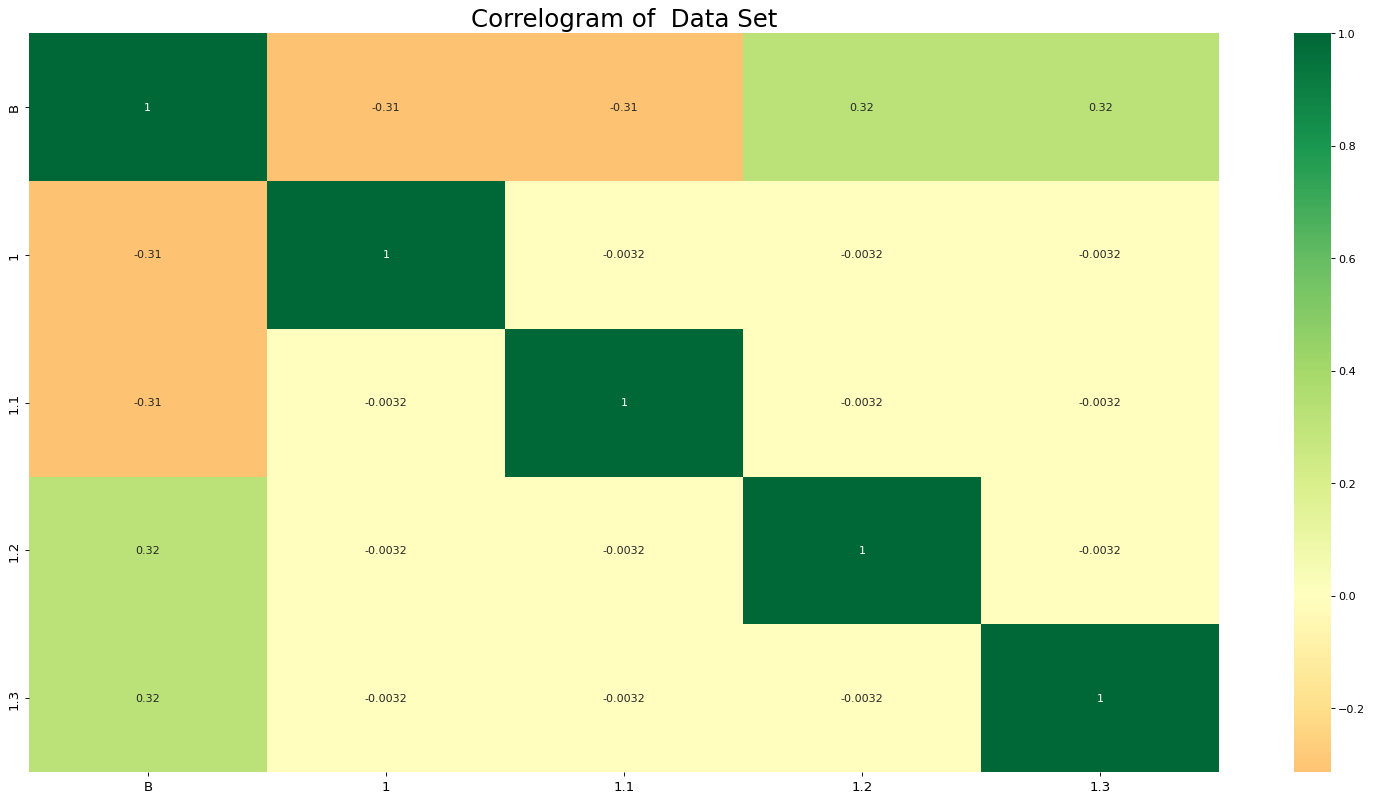

In [8]:
plot_corr(encoded_orig_data)

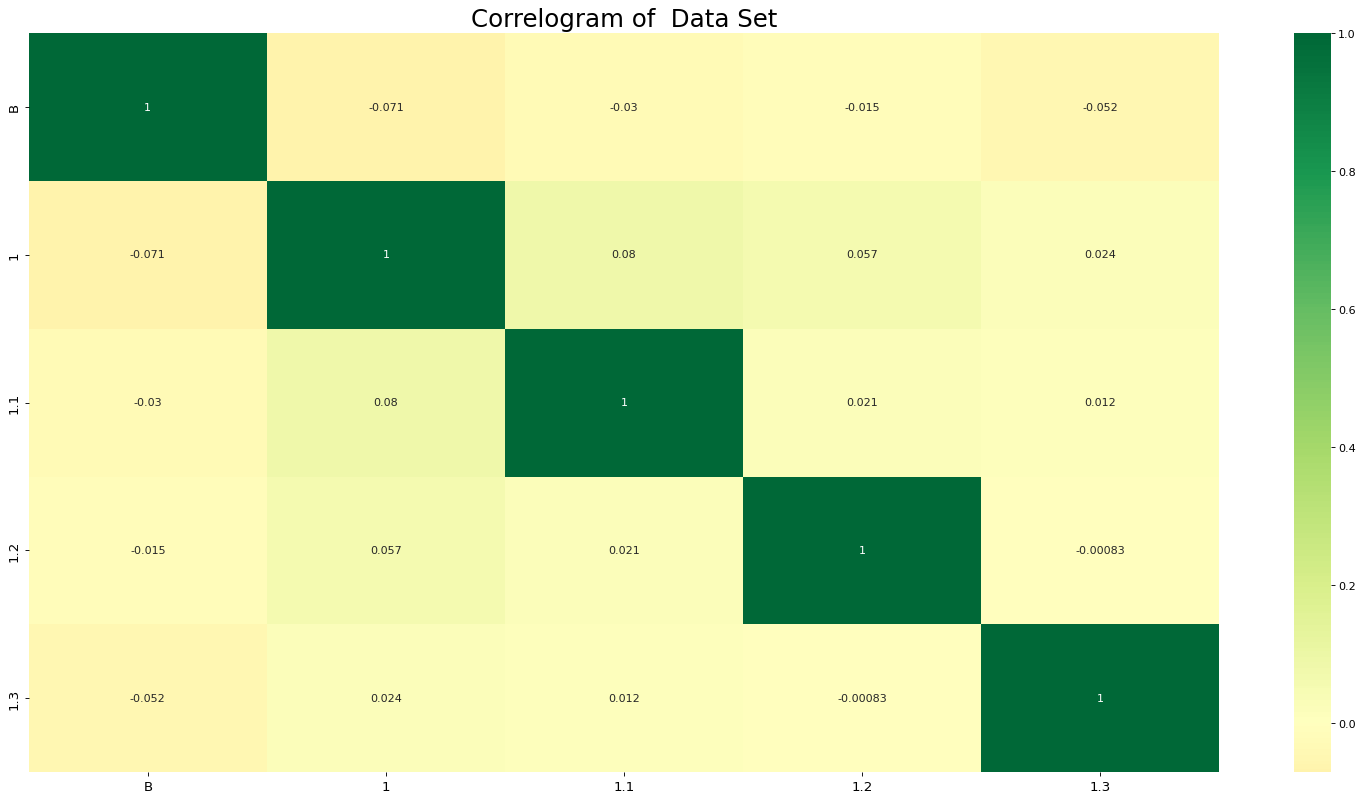

In [9]:
plot_corr(encoded_synt_data)

In [10]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CTGAN', 624, 'B', categorical_cols)

In [11]:
r1.mean()

0.8384615384615384

In [12]:
r2.mean()

0.42435897435897435

In [13]:
r3.mean()

0.5615384615384615

In [14]:
r4.mean()

0.4269230769230769

# TVAE

In [15]:
synt_data = generate_data(orig_data, "TVAE", 624)

In [16]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_balance)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.78it/s]


Overall Quality Score: 80.72%

Properties:
Column Shapes: 87.08%
Column Pair Trends: 74.36%


,Column,Metric,Quality Score
0,B,TVComplement,0.923077
1,1,TVComplement,0.822115
2,1.1,TVComplement,0.884615
3,1.2,TVComplement,0.863782
4,1.3,TVComplement,0.860577


In [17]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

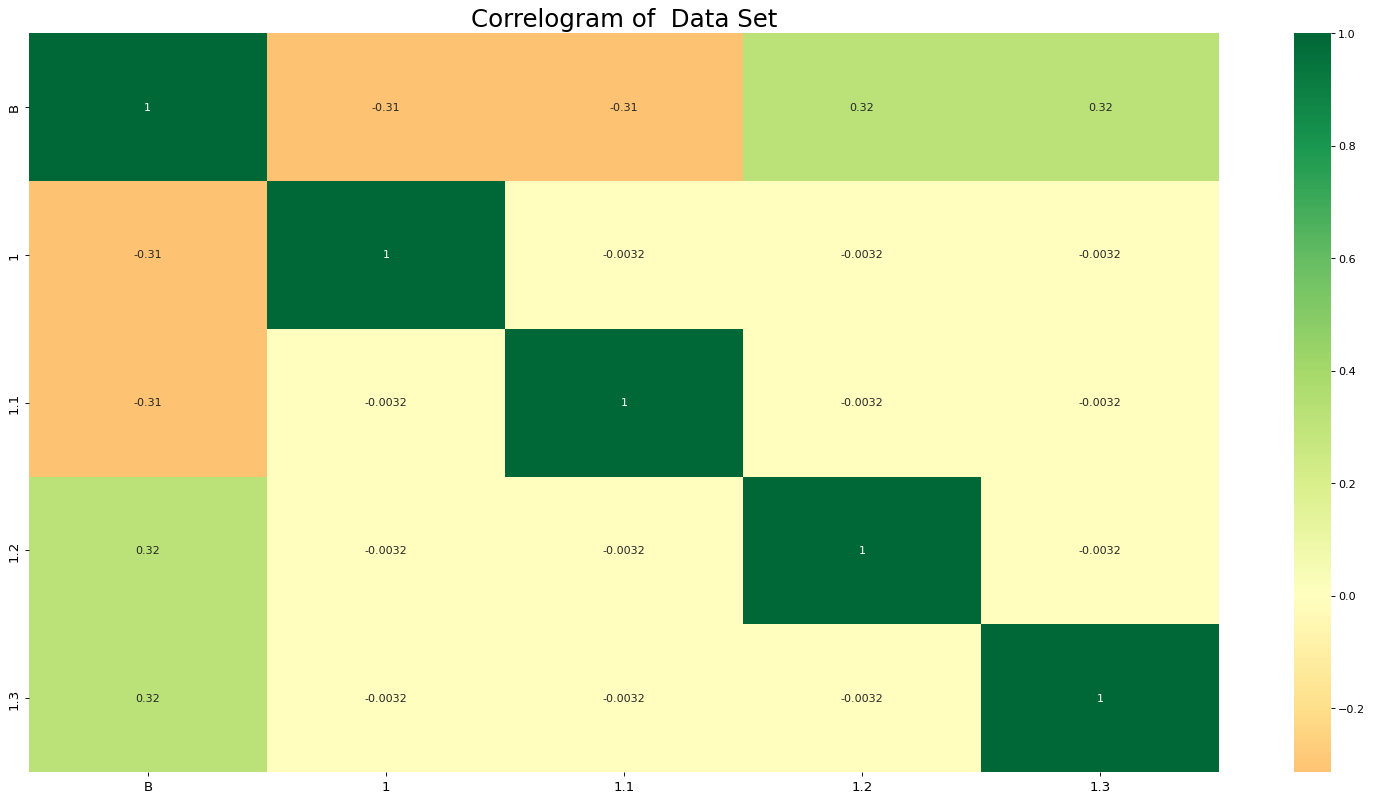

In [18]:
plot_corr(encoded_orig_data)

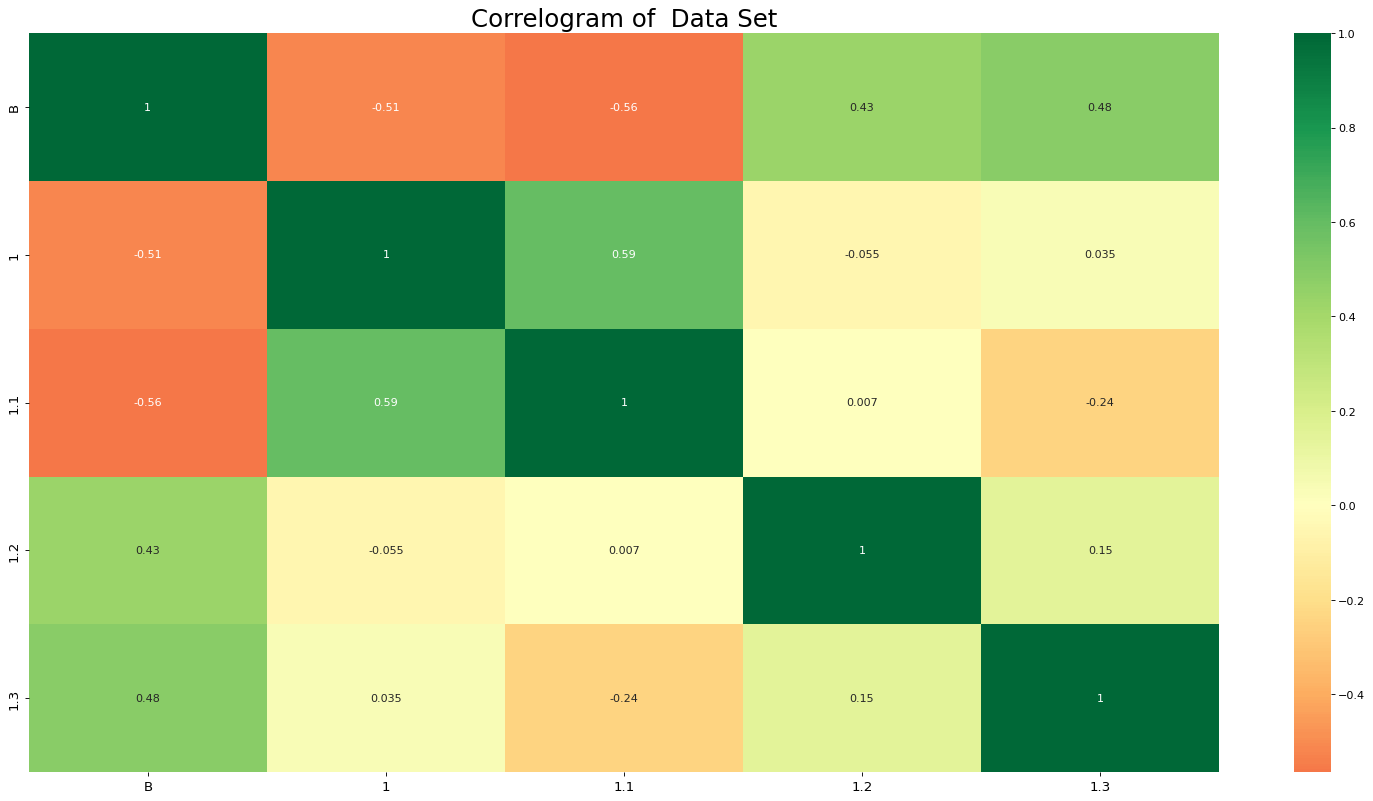

In [19]:
plot_corr(encoded_synt_data)

In [20]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'TVAE', 624, 'B', categorical_cols)

In [21]:
r1.mean()

0.8461538461538461

In [22]:
r2.mean()

0.0564102564102564

In [23]:
r3.mean()

0.8974358974358975

In [24]:
r4.mean()

0.06923076923076923

# CopulaGAN

In [25]:
synt_data = generate_data(orig_data, "CopulaGan", 624)

In [26]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_balance)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.61it/s]


Overall Quality Score: 65.85%

Properties:
Column Shapes: 71.09%
Column Pair Trends: 60.61%


,Column,Metric,Quality Score
0,B,TVComplement,0.751603
1,1,TVComplement,0.639423
2,1.1,TVComplement,0.769231
3,1.2,TVComplement,0.713141
4,1.3,TVComplement,0.681090


In [27]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

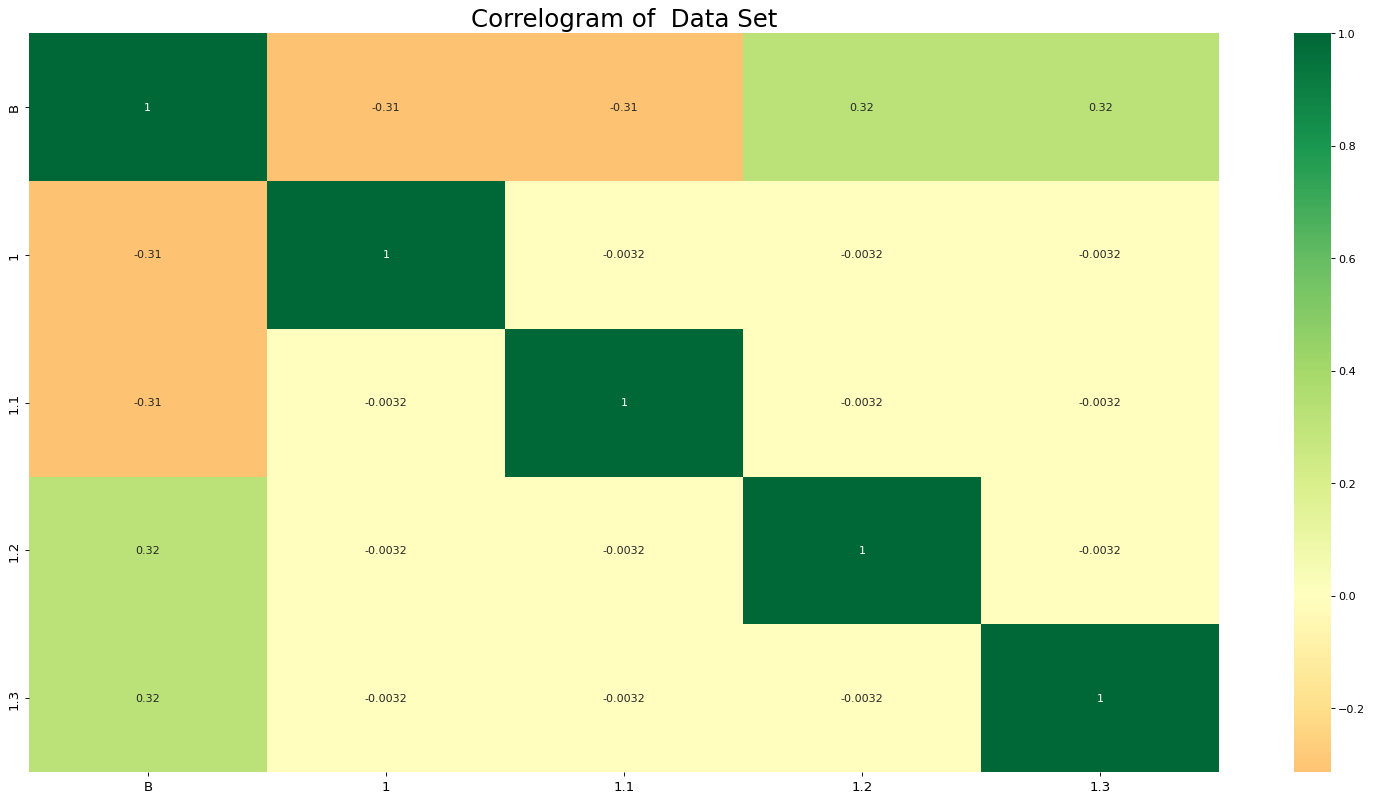

In [28]:
plot_corr(encoded_orig_data)

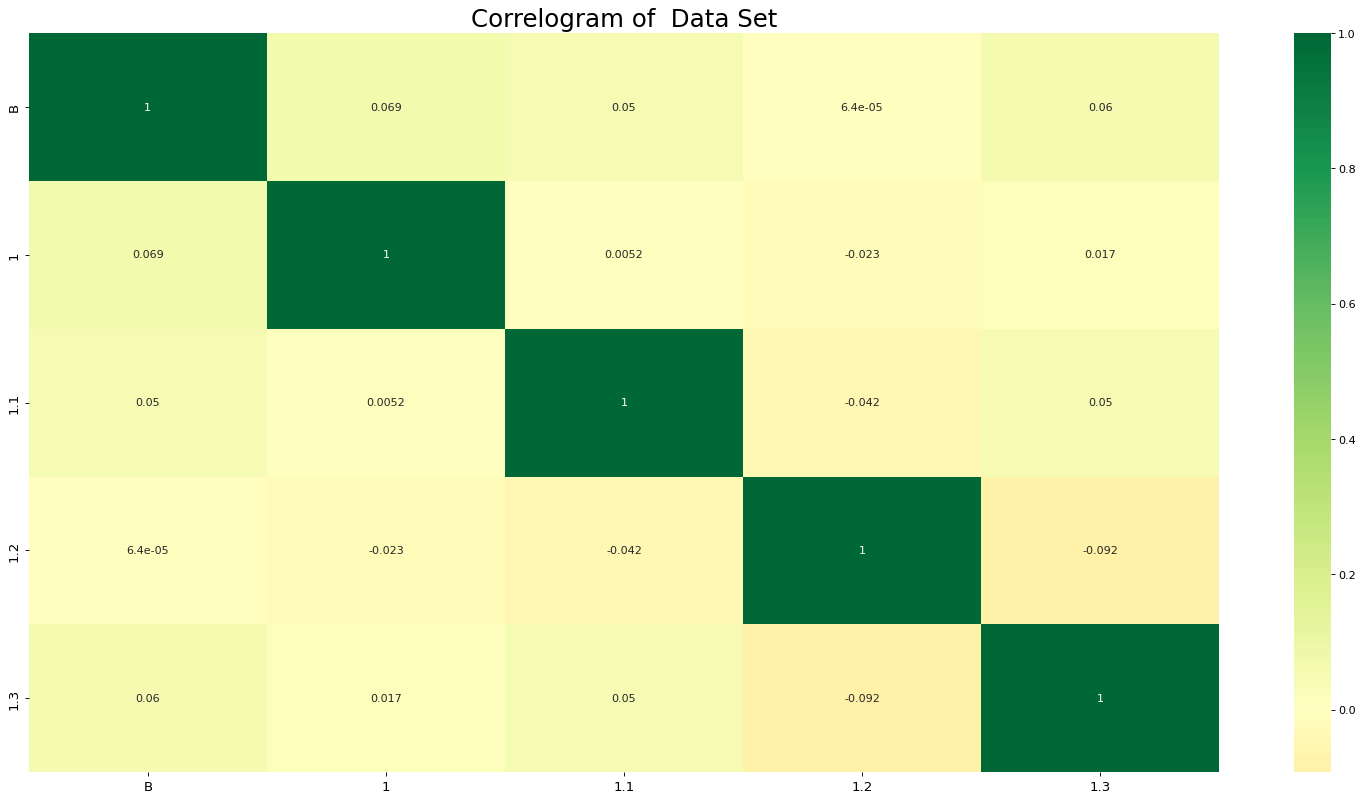

In [29]:
plot_corr(encoded_synt_data)

In [30]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CopulaGan', 624, 'B', categorical_cols)

In [31]:
r1.mean()

0.8423076923076923

In [32]:
r2.mean()

0.46794871794871795

In [33]:
r3.mean()

0.5423076923076923

In [34]:
r4.mean()

0.4564102564102564

# GaussianCopula

In [35]:
synt_data = generate_data(orig_data, "GaussianCopula", 624)

In [36]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_balance)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 32.96it/s]


Overall Quality Score: 82.88%

Properties:
Column Shapes: 86.09%
Column Pair Trends: 79.68%


,Column,Metric,Quality Score
0,B,TVComplement,0.915064
1,1,TVComplement,0.844551
2,1.1,TVComplement,0.887821
3,1.2,TVComplement,0.823718
4,1.3,TVComplement,0.833333


In [37]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
encoded_synt_data = encode_columns(synt_data, categorical_cols)

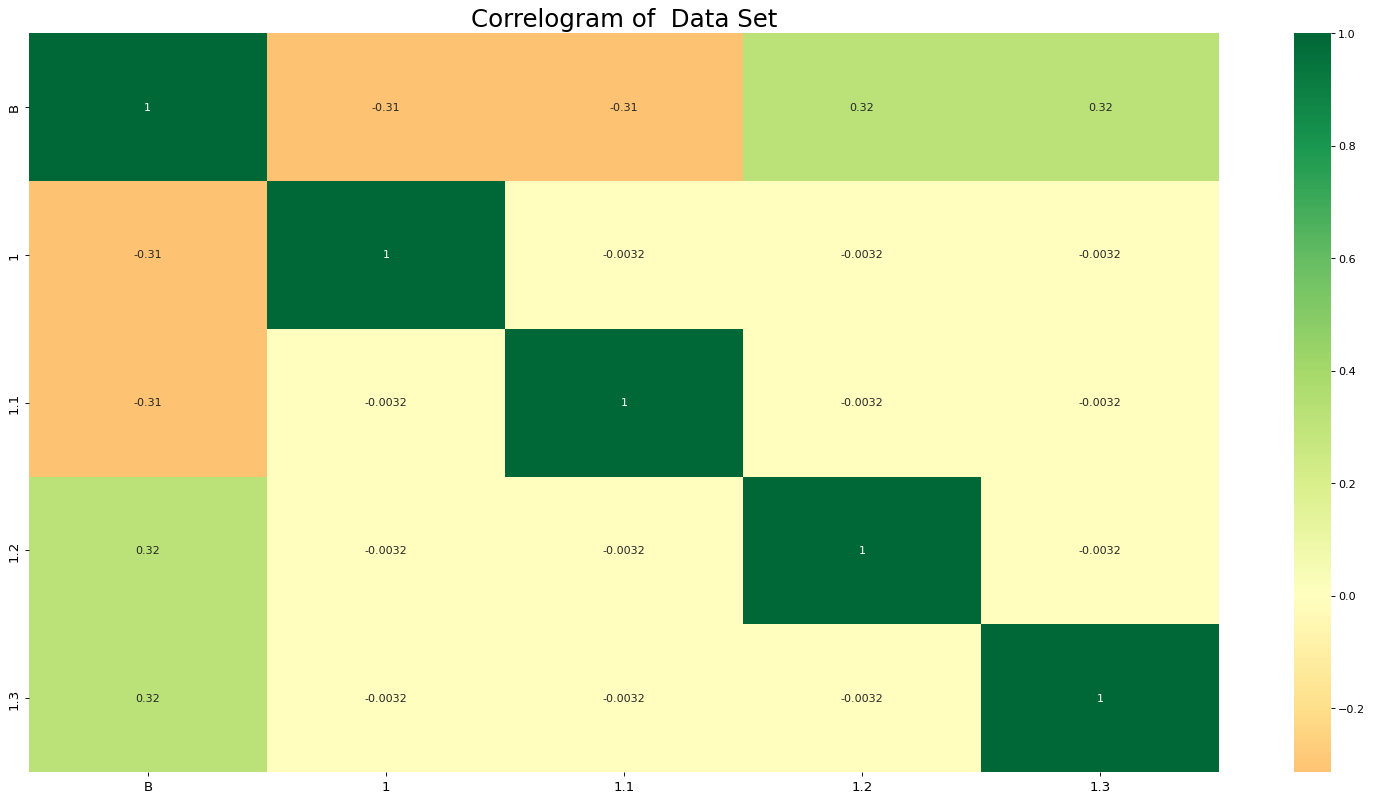

In [38]:
plot_corr(encoded_orig_data)

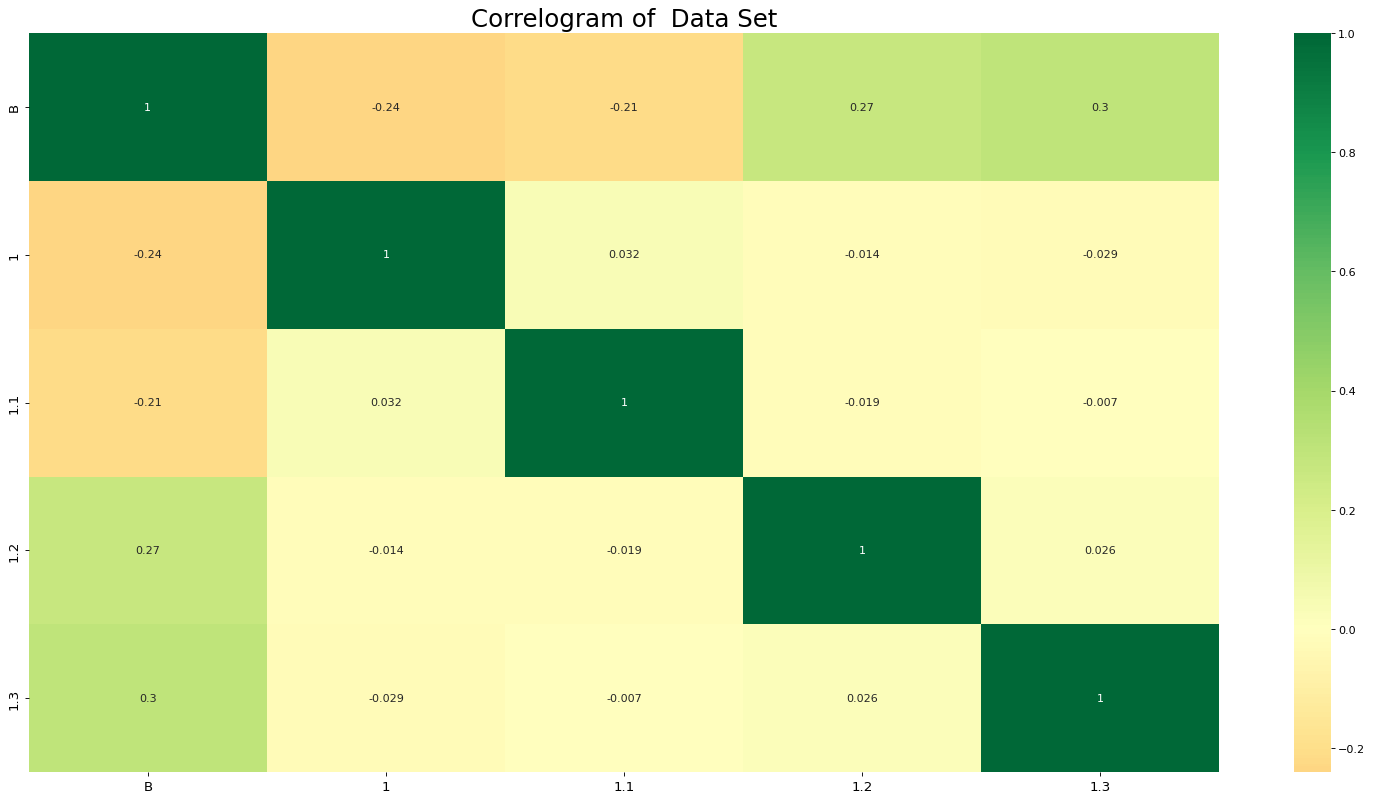

In [39]:
plot_corr(encoded_synt_data)

In [40]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'GaussianCopula', 624, 'B', categorical_cols)

In [41]:
r1.mean()

0.8358974358974359

In [42]:
r2.mean()

0.5538461538461539

In [43]:
r3.mean()

0.5512820512820513

In [44]:
r4.mean()

0.6384615384615384